# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy.stats import linregress

# Study data files
mouse_metadata_path = Path('./Pymaceuticals/data/Mouse_metadata.csv')
study_results_path = Path('./Pymaceuticals/data/Study_results.csv')


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pymaceuticals_DF = pd.merge(mouse_metadata, study_results, how='outer', on=["Mouse ID"])

# Display the data table for preview
Pymaceuticals_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(Pymaceuticals_DF["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates = Pymaceuticals_DF[["Mouse ID", "Timepoint"]].duplicated(keep=False)
(Pymaceuticals_DF["Mouse ID"].loc[Duplicates]).unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Pymaceuticals_DF.loc[Duplicates]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:

#Pymaceuticals_DF = Pymaceuticals_DF[Pymaceuticals_DF['Mouse ID'] !='g989']

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pymaceuticals_DF = Pymaceuticals_DF[Pymaceuticals_DF['Mouse ID'] !='g989']
mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
Pymaceuticals_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(Pymaceuticals_DF["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_Mean = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_Regimen_Median = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_Regimen_Variance = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_Regimen_Std = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_Regimen_Sem = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": Drug_Regimen_Mean, "Median Tumor Volume": Drug_Regimen_Median, "Tumor Volume Variance": Drug_Regimen_Variance, "Tumor Vol Std.Dev.": Drug_Regimen_Std, "Tumor Vol Std.Err.": Drug_Regimen_Sem })
summary_df





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Vol Std.Dev.,Tumor Vol Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

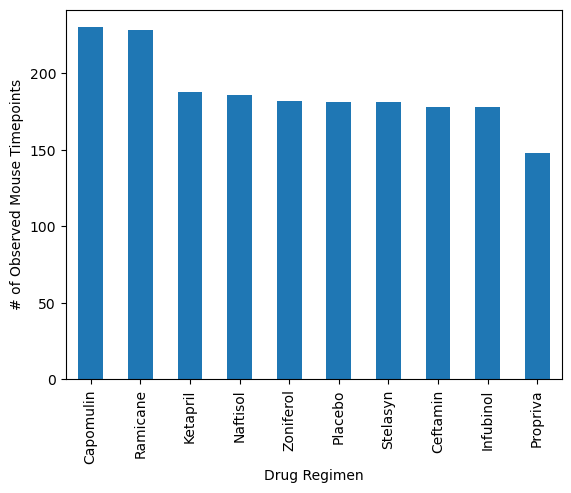

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_timepoints = Pymaceuticals_DF.groupby("Drug Regimen")["Timepoint"].count()
Bar_df = pd.DataFrame({"Observed Timepoints": observed_timepoints})
Bar_df= Bar_df.sort_values(by=["Observed Timepoints"], ascending=False)
Bar_df.plot(kind="bar",xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints",legend=False)

Text(0, 0.5, '# of Observed timepoints')

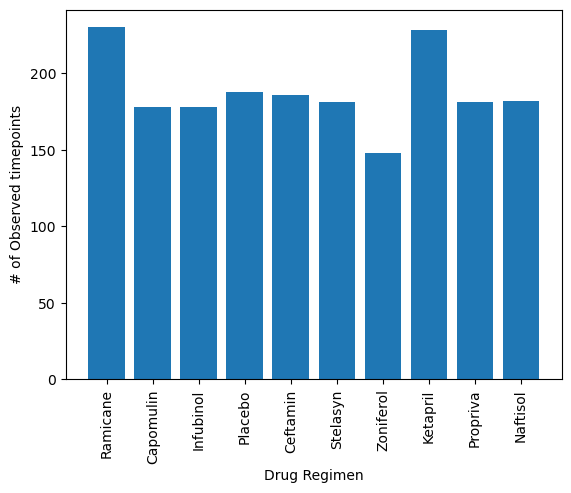

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Labels = Pymaceuticals_DF["Drug Regimen"].unique()
timepoints = []
for timepoint in observed_timepoints:
    timepoints.append(timepoint)
x = np.arange(len(Labels))
plt.bar(Labels, timepoints)
xticks = plt.xticks(x, labels= Labels, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed timepoints")



<Axes: ylabel='Sex Count'>

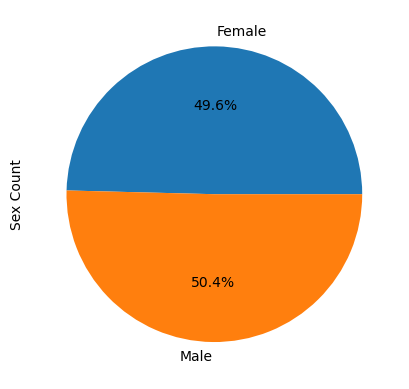

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_Count_Panda = mouse_metadata.groupby("Sex")["Sex"].count()
Mouse_Pie_df = pd.DataFrame({"Sex Count": Sex_Count_Panda})
Mouse_Pie_df
Mouse_Pie_df.plot(kind="pie", y="Sex Count", legend=False, autopct="%1.1f%%", ylabel="Sex Count")



([<matplotlib.patches.Wedge at 0x1750aaf10>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

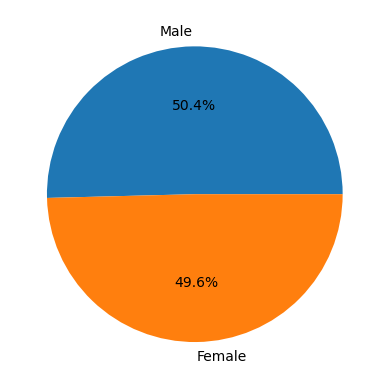

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_label = mouse_metadata["Sex"].unique()
Sex_count = mouse_metadata["Sex"].value_counts()
plt.pie(Sex_count, labels=Sex_label,autopct="%1.1f%%")










## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Group = Pymaceuticals_DF.groupby(["Mouse ID"])["Timepoint"].max()
Timepoint_max_df = pd.DataFrame({"Timepoint": Group})
Timepoint_max_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Boxplotprep_df = pd.merge(Timepoint_max_df, Pymaceuticals_DF, on=["Mouse ID", "Timepoint"], how="left")
Boxplotprep_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Drugs_dict = {"Capomulin": [], "Ramicane": [], "Infubinol": [], "Ceftamin": []}
# Create empty list to fill with tumor vol data (for plotting)
for Drug in Drugs_dict:
    for ind in Boxplotprep_df.index:
        if Boxplotprep_df["Drug Regimen"][ind] == Drug:
            Drugs_dict[Drug].append(Boxplotprep_df["Tumor Volume (mm3)"][ind])
Drugs_dict


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Boxplot_df = pd.DataFrame(Drugs_dict)
Quantiles_df = Boxplot_df.quantile([.25,.5,.75])

lowerq = Quantiles_df.loc[.25]
upperq = Quantiles_df.loc[.75]
IQR = upperq - lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

for drug in Drugs:
    print(f'Potential Lower Bound Outliers for {drug}: {Boxplot_df[drug][Boxplot_df[drug]< lower_bound[drug]]}')
    print(f'Potential Upper Bound Outliers for {drug}: {Boxplot_df[drug][Boxplot_df[drug] > upper_bound[drug]]}')
        


Potential Lower Bound Outliers for Capomulin: Series([], Name: Capomulin, dtype: float64)
Potential Upper Bound Outliers for Capomulin: Series([], Name: Capomulin, dtype: float64)
Potential Lower Bound Outliers for Ramicane: Series([], Name: Ramicane, dtype: float64)
Potential Upper Bound Outliers for Ramicane: Series([], Name: Ramicane, dtype: float64)
Potential Lower Bound Outliers for Infubinol: 5    36.321346
Name: Infubinol, dtype: float64
Potential Upper Bound Outliers for Infubinol: Series([], Name: Infubinol, dtype: float64)
Potential Lower Bound Outliers for Ceftamin: Series([], Name: Ceftamin, dtype: float64)
Potential Upper Bound Outliers for Ceftamin: Series([], Name: Ceftamin, dtype: float64)


<Axes: ylabel='Final Tumor Volume (mm3)'>

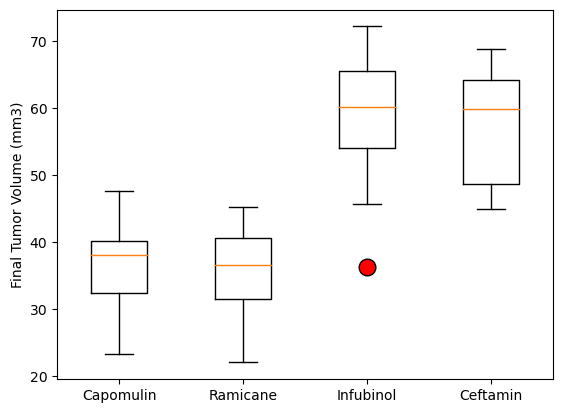

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
Boxprops = dict(markeredgecolor = 'b')
Medianprops = dict(markeredgecolor = 'o')
Whiskerprops = dict(markeredgecolor = 'b')
Capprops = dict(markeredgecolor = 'b')
Boxplot_df.plot(kind="box", ylabel="Final Tumor Volume (mm3)", flierprops = Flierprops, boxprops = Boxprops, whiskerprops = Whiskerprops, medianprops = Medianprops, capprops = Capprops)

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

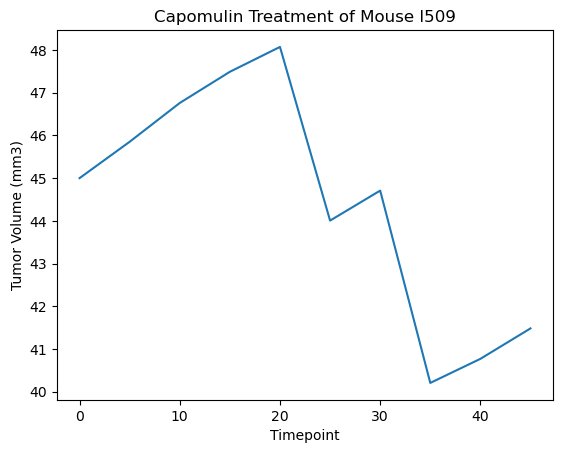

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_filter = Pymaceuticals_DF["Mouse ID"] == "l509"
l509_DF = Pymaceuticals_DF.loc[l509_filter]
l509_DF.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse l509", legend=False, ylabel = "Tumor Volume (mm3)")


<Axes: xlabel='Mouse Weight', ylabel='Tumor Volume (mm3)'>

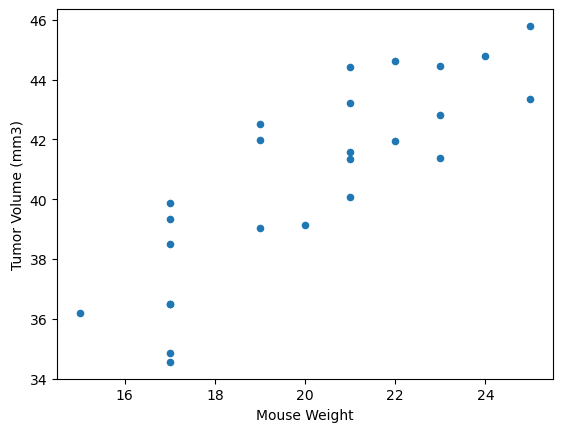

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capo_filter = Pymaceuticals_DF["Drug Regimen"] == "Capomulin"
Capo_DF = Pymaceuticals_DF.loc[Capo_filter]
mean_Tumor = Capo_DF.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_Weight = Capo_DF.groupby("Mouse ID")["Weight (g)"].mean()
Scatter_DF = pd.DataFrame({"Mouse Weight": mean_Weight, "Tumor Volume (mm3)": mean_Tumor})
Scatter_DF.plot(kind="scatter", x="Mouse Weight", y="Tumor Volume (mm3)")


## Correlation and Regression

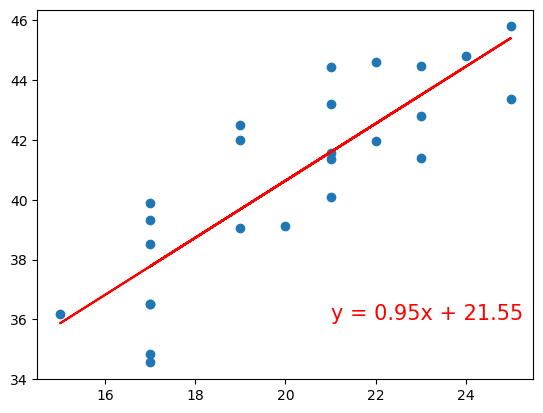

The correlation between Mouse Weight and Tumor Volume is 0.84


In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = Scatter_DF["Mouse Weight"]
y_values = Scatter_DF["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.xlabel = "Mouse Weight"
plt.ylabel = "Tumor Volume (mm3)"
plt.show()
print(f"The correlation between Mouse Weight and Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
